In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib


In [2]:
df = pd.read_csv("Nagaland-1.csv")


In [3]:
df

,Unnamed: 0,T2M,PRECTOTCORR,DY,MO,YEAR,RH2M,WD50M,WS2M
0,0,12.62,0.0,1,1,2011,71.75,206.19,0.44
1,1,11.12,0.0,2,1,2011,85.69,212.25,0.29
2,2,10.67,1.0,3,1,2011,80.00,186.81,0.47
3,3,10.89,1.0,4,1,2011,75.62,171.19,0.43
4,4,11.69,1.0,5,1,2011,74.94,174.69,0.48
...,...,...,...,...,...,...,...,...,...
3738,3738,20.29,1.0,27,3,2021,44.31,227.81,0.39
3739,3739,20.87,1.0,28,3,2021,45.44,234.94,0.41
3740,3740,20.60,0.0,29,3,2021,50.25,237.62,0.34
3741,3741,18.20,0.0,30,3,2021,81.44,208.25,0.27


In [4]:
d=df.drop(['Unnamed: 0'],axis=1)

In [5]:
df=d.copy()

In [6]:
X = df.drop(["PRECTOTCORR", "DY","MO","YEAR","RH2M","WS2M",'WD50M'], axis=1)
Y = df["PRECTOTCORR"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)

In [8]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info


array([0.18505179])

In [9]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)


T2M    0.185052
dtype: float64

<AxesSubplot:>

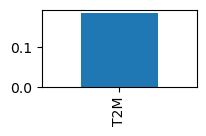

In [10]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(2, 1))


In [11]:
sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))


The number of classes before fit Counter({0.0: 2126, 1.0: 868})
The number of classes after fit Counter({0.0: 2126, 1.0: 2126})


In [12]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)


LogisticRegression()

In [13]:
y_pred2 = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[429 103]
 [ 43 174]]
0.8050734312416555
              precision    recall  f1-score   support

         0.0       0.91      0.81      0.85       532
         1.0       0.63      0.80      0.70       217

    accuracy                           0.81       749
   macro avg       0.77      0.80      0.78       749
weighted avg       0.83      0.81      0.81       749



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.8041171477079796

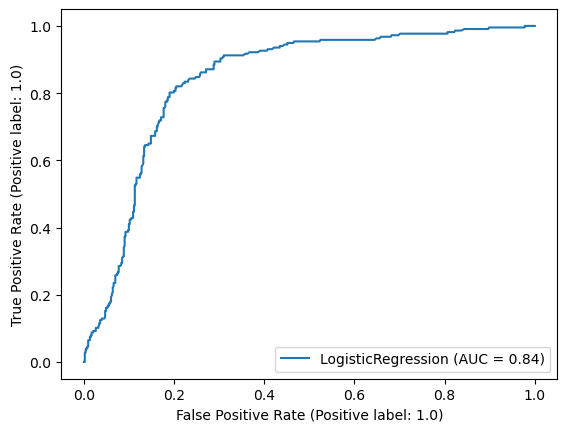

In [14]:
metrics.plot_roc_curve(logreg, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred2, average=None)


In [15]:
gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res)


GaussianNB()

In [16]:
y_pred3 = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[426 106]
 [ 42 175]]
0.8024032042723631
              precision    recall  f1-score   support

         0.0       0.91      0.80      0.85       532
         1.0       0.62      0.81      0.70       217

    accuracy                           0.80       749
   macro avg       0.77      0.80      0.78       749
weighted avg       0.83      0.80      0.81       749



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.8036017463012369

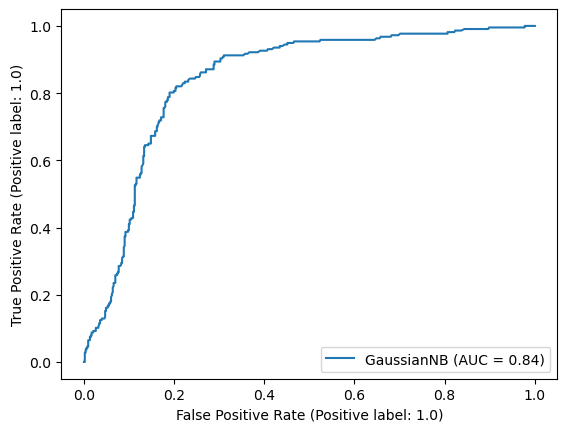

In [17]:
metrics.plot_roc_curve(gnb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred3, average=None)


In [18]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res, y_train_res)


KNeighborsClassifier(n_neighbors=3)

In [19]:
y_pred4 = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[417 115]
 [ 69 148]]
0.7543391188251002
              precision    recall  f1-score   support

         0.0       0.86      0.78      0.82       532
         1.0       0.56      0.68      0.62       217

    accuracy                           0.75       749
   macro avg       0.71      0.73      0.72       749
weighted avg       0.77      0.75      0.76       749



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [20]:
from sklearn.metrics import RocCurveDisplay

/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7329311181178754

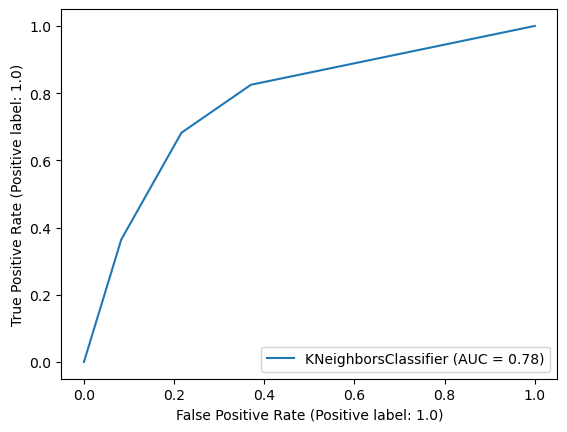

In [21]:
metrics.plot_roc_curve(knn, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred4, average=None)


In [22]:
svc = SVC()


In [23]:
svc.fit(X_train_res, y_train_res)


SVC()

In [24]:
y_pred5 = svc.predict(X_test)
print(confusion_matrix(y_test,y_pred5))
print(accuracy_score(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

[[402 130]
 [ 34 183]]
0.7810413885180241
              precision    recall  f1-score   support

         0.0       0.92      0.76      0.83       532
         1.0       0.58      0.84      0.69       217

    accuracy                           0.78       749
   macro avg       0.75      0.80      0.76       749
weighted avg       0.82      0.78      0.79       749



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7994785350472956

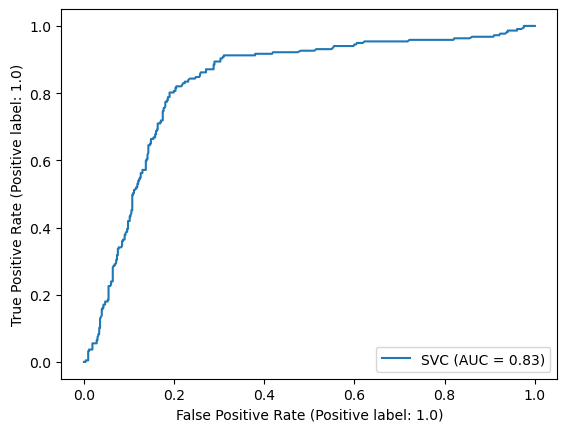

In [25]:
metrics.plot_roc_curve(svc, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred5, average=None)


In [26]:
# create model instance
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
y_pred6 = bst.predict(X_test)

In [27]:
# y_pred6 = xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred6))
print(accuracy_score(y_test,y_pred6))
print(classification_report(y_test,y_pred6))

[[451  81]
 [ 71 146]]
0.7970627503337784
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.86       532
         1.0       0.64      0.67      0.66       217

    accuracy                           0.80       749
   macro avg       0.75      0.76      0.76       749
weighted avg       0.80      0.80      0.80       749



In [28]:
rf=RandomForestClassifier()
rf.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [29]:
y_pred1 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[420 112]
 [ 88 129]]
0.732977303070761
              precision    recall  f1-score   support

         0.0       0.83      0.79      0.81       532
         1.0       0.54      0.59      0.56       217

    accuracy                           0.73       749
   macro avg       0.68      0.69      0.69       749
weighted avg       0.74      0.73      0.74       749



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.6919718651467378

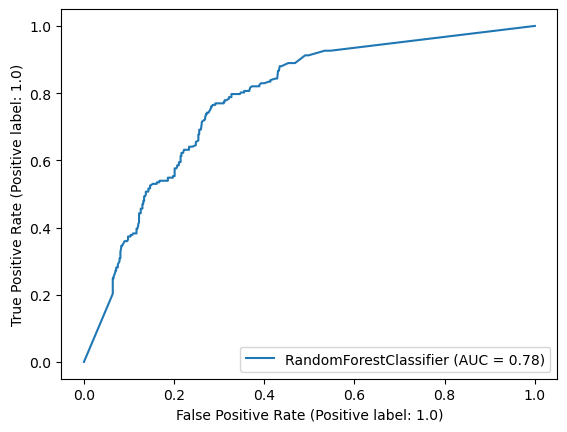

In [30]:
metrics.plot_roc_curve(rf, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred1, average=None)


In [31]:
cat = CatBoostClassifier(iterations=2000, eval_metric="AUC")
cat.fit(X_train_res, y_train_res)


Learning rate set to 0.010123
0:	total: 49.3ms	remaining: 1m 38s
1:	total: 50.4ms	remaining: 50.3s
2:	total: 51.4ms	remaining: 34.2s
3:	total: 52.4ms	remaining: 26.1s
4:	total: 53.4ms	remaining: 21.3s
5:	total: 54.5ms	remaining: 18.1s
6:	total: 55.6ms	remaining: 15.8s
7:	total: 56.9ms	remaining: 14.2s
8:	total: 58.2ms	remaining: 12.9s
9:	total: 59.4ms	remaining: 11.8s
10:	total: 60.5ms	remaining: 10.9s
11:	total: 61.5ms	remaining: 10.2s
12:	total: 62.5ms	remaining: 9.55s
13:	total: 63.6ms	remaining: 9.02s
14:	total: 64.6ms	remaining: 8.55s
15:	total: 65.7ms	remaining: 8.14s
16:	total: 66.7ms	remaining: 7.78s
17:	total: 68ms	remaining: 7.49s
18:	total: 69.5ms	remaining: 7.25s
19:	total: 70.8ms	remaining: 7.01s
20:	total: 71.9ms	remaining: 6.77s
21:	total: 72.9ms	remaining: 6.55s
22:	total: 73.9ms	remaining: 6.35s
23:	total: 75.1ms	remaining: 6.18s
24:	total: 76.2ms	remaining: 6.02s
25:	total: 77.2ms	remaining: 5.86s
26:	total: 78.4ms	remaining: 5.73s
27:	total: 79.5ms	remaining: 5.6s
28

In [32]:
y_pred = cat.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[409 123]
 [ 35 182]]
0.7890520694259012
              precision    recall  f1-score   support

         0.0       0.92      0.77      0.84       532
         1.0       0.60      0.84      0.70       217

    accuracy                           0.79       749
   macro avg       0.76      0.80      0.77       749
weighted avg       0.83      0.79      0.80       749



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.803753334950279

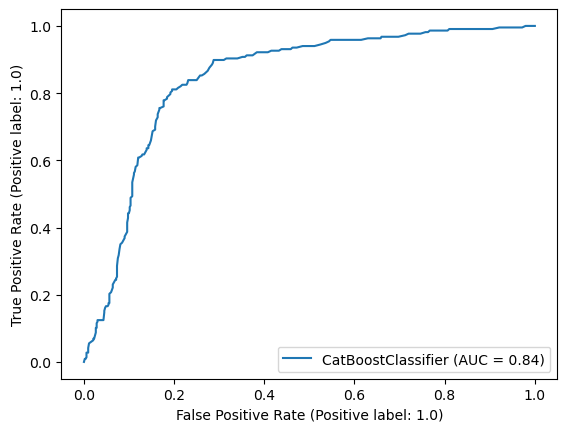

In [33]:
from sklearn import metrics
metrics.plot_roc_curve(cat, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None) 

In [34]:
joblib.dump(rf, "rf.pkl")
joblib.dump(logreg, "logreg.pkl")
joblib.dump(gnb, "gnb.pkl")
joblib.dump(knn, "knn.pkl")
joblib.dump(svc, "svc.pkl")
joblib.dump(bst, "xgb.pkl")
joblib.dump(svc, "cat.pkl")

['cat.pkl']